In [3]:
import bokeh.io
import bokeh.plotting
from bokeh.io import output_file, show
from bokeh.layouts import column, row
from bokeh.layouts import gridplot
from bokeh.plotting import figure
import sys
import glob 
import os 
import scipy.io as sio
import numpy as np
import decimal as dc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from bokeh.models import ColumnDataSource, Whisker

from natsort import natsorted, ns

from bokeh.models import Legend

from pathlib import Path

from scipy.stats import norm

# Enable viewing Bokeh plots in the notebook
bokeh.io.output_notebook()

Loading BokehJS ...

In [4]:
MiceToAnalyze = ['GF173','GF174','GF175','GF181','GF187','GF193','GF199','GF200','GF201','GF207']
ArtiFactMice = ['GF173','GF174','GF175','GF181','GF187','GF193','GF199']
LearningDictionary = {
    
    'GF173' : True,
    'GF174' : True,
    'GF175' : True,
    'GF181' : True,
    'GF182' : False,
    'GF187' : False,
    'GF193' : True,
    'GF199' : True,
    'GF200' : True,
    'GF201' : True,
    'GF202' : True,
    'GF203' : False,
    'GF204' : True,
    'GF206' : True,
    'GF207' : False,
    'GF209' : True 
    
    
}
ControlMice = ['GF208']

In [5]:
#Read the 2P pickle file for every mouse to analyse

FS = 0
SS = 0

serverPath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\analysis\\Georgios_Foustoukos\\'

dataDays = np.zeros([len(MiceToAnalyze),6,211,8])

for i, mouse in enumerate(MiceToAnalyze):
    
    print('Reading 2P file for the mouse : ' + mouse + '...')
    
    dataPath = serverPath + mouse + "\\2P\\" + mouse + '_2P.p' 
    
    with open(dataPath, 'rb') as fp:
        data = pickle.load(fp)
      
    print('Calculating mean for mouse: ' + mouse)
    
    if LearningDictionary[mouse]:
        
        print('Fast switcher')
        
        FS +=1 
        
        
    else:
        
        print('Slow switcher')
        
        SS +=1     
    
    for d in range(6):
        
        dataDays[i,d,:,0] = np.mean(data[d]['WM']['WMDFF'],axis = (0,2))
        dataDays[i,d,:,1] = np.mean(data[d]['AM']['AMDFF'],axis = (0,2))
        dataDays[i,d,:,2] = np.mean(data[d]['WH']['WHDFF'],axis = (0,2))
        dataDays[i,d,:,3] = np.mean(data[d]['AH']['AHDFF'],axis = (0,2))
        dataDays[i,d,:,4] = np.mean(data[d]['CR']['CRDFF'],axis = (0,2))
        dataDays[i,d,:,5] = np.mean(data[d]['FA']['FADFF'],axis = (0,2))
        
        dayWHStim = np.concatenate((np.mean(data[d]['WM']['WMDFF'],axis = 0),np.mean(data[d]['WH']['WHDFF'],axis = 0)),axis =1)
        
        daysAudStim = np.concatenate((np.mean(data[d]['AM']['AMDFF'],axis = 0),np.mean(data[d]['AH']['AHDFF'],axis = 0)),axis =1)
        
        dataDays[i,d,:,6] = np.mean(dayWHStim,axis = 1)
        dataDays[i,d,:,7] = np.mean(daysAudStim,axis = 1)
        
        if mouse in ArtiFactMice:
            
            print('Mouse with artifact, correcting using CR..')
            
            dataDays[i,d,:,0] = dataDays[i,d,:,0] - dataDays[i,d,:,4]
            dataDays[i,d,:,1] = dataDays[i,d,:,1] - dataDays[i,d,:,4]
            dataDays[i,d,:,2] = dataDays[i,d,:,2] - dataDays[i,d,:,4]
            dataDays[i,d,:,3] = dataDays[i,d,:,3] - dataDays[i,d,:,4]
            dataDays[i,d,:,5] = dataDays[i,d,:,5] - dataDays[i,d,:,4]
            dataDays[i,d,:,6] = dataDays[i,d,:,6] - dataDays[i,d,:,4]
            dataDays[i,d,:,7] = dataDays[i,d,:,7] - dataDays[i,d,:,4]
        
        

   
    

Reading 2P file for the mouse : GF173...
Calculating mean for mouse: GF173
Fast switcher
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Reading 2P file for the mouse : GF174...


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


Calculating mean for mouse: GF174
Fast switcher
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Reading 2P file for the mouse : GF175...
Calculating mean for mouse: GF175
Fast switcher
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Reading 2P file for the mouse : GF181...
Calculating mean for mouse: GF181
Fast switcher
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..
Mouse with artifact, correcting using CR..


In [6]:
#Read the 2P pickle file for every mouse in the control group

serverPath = '\\\\sv1files.epfl.ch\\Petersen-Lab\\analysis\\Georgios_Foustoukos\\'

dataDaysControl = np.zeros([len(ControlMice),6,211,8])

for i, mouse in enumerate(ControlMice):
    
    print('Reading 2P file for the mouse : ' + mouse + '...')
    
    dataPath = serverPath + mouse + "\\2P\\" + mouse + '_2P.p' 
    
    with open(dataPath, 'rb') as fp:
        data = pickle.load(fp)
      
    print('Calculating mean for control mouse: ' + mouse)
      
    
    for d in range(6):
        
        dataDaysControl[i,d,:,0] = np.mean(data[d]['WM']['WMDFF'],axis = (0,2))
        dataDaysControl[i,d,:,1] = np.mean(data[d]['AM']['AMDFF'],axis = (0,2))
        dataDaysControl[i,d,:,2] = np.mean(data[d]['WH']['WHDFF'],axis = (0,2))
        dataDaysControl[i,d,:,3] = np.mean(data[d]['AH']['AHDFF'],axis = (0,2))
        dataDaysControl[i,d,:,4] = np.mean(data[d]['CR']['CRDFF'],axis = (0,2))
        dataDaysControl[i,d,:,5] = np.mean(data[d]['FA']['FADFF'],axis = (0,2))
        
        dayWHStim = np.concatenate((np.mean(data[d]['WM']['WMDFF'],axis = 0),np.mean(data[d]['WH']['WHDFF'],axis = 0)),axis =1)
        
        daysAudStim = np.concatenate((np.mean(data[d]['AM']['AMDFF'],axis = 0),np.mean(data[d]['AH']['AHDFF'],axis = 0)),axis =1)
        
        dataDaysControl[i,d,:,6] = np.mean(dayWHStim,axis = 1)
        dataDaysControl[i,d,:,7] = np.mean(daysAudStim,axis = 1)
        
        
        if mouse in ArtiFactMice:
            
            print('Mouse with artifact, correcting using CR..')
            
            dataDaysControl[i,d,:,0] = dataDaysControl[i,d,:,0] - dataDaysControl[i,d,:,4]
            dataDaysControl[i,d,:,1] = dataDaysControl[i,d,:,1] - dataDaysControl[i,d,:,4]
            dataDaysControl[i,d,:,2] = dataDaysControl[i,d,:,2] - dataDaysControl[i,d,:,4]
            dataDaysControl[i,d,:,3] = dataDaysControl[i,d,:,3] - dataDaysControl[i,d,:,4]
            dataDaysControl[i,d,:,5] = dataDaysControl[i,d,:,5] - dataDaysControl[i,d,:,4]
            dataDaysControl[i,d,:,6] = dataDaysControl[i,d,:,6] - dataDaysControl[i,d,:,4]
            dataDaysControl[i,d,:,7] = dataDaysControl[i,d,:,7] - dataDaysControl[i,d,:,4]

Reading 2P file for the mouse : GF208...
Calculating mean for control mouse: GF208


In [2]:
data[5]['AM']['AMDFF'].shape

NameError: name 'data' is not defined

In [27]:
data[5]['WH']['WHDFF'].shape

(127, 211, 5)

In [30]:
dayWHStim = np.concatenate((np.mean(data[d]['WM']['WMDFF'],axis = 0),np.mean(data[d]['WH']['WHDFF'],axis = 0)),axis =1)
        

In [31]:
dayWHStim.shape

(211, 172)

In [8]:
dataDaysSS = np.zeros([SS,6,211,8])
dataDaysFS = np.zeros([FS,6,211,8])
CounterFS = 0
CounterSS = 0

for i, mouse in enumerate(MiceToAnalyze):
    
    print('Checking : ' + mouse + '...')
    
    if LearningDictionary[mouse]:
        
        print('Fast switcher')
        
        dataDaysFS[CounterFS,:,:,:] = dataDays[i,:,:,:]
        CounterFS += 1
        
    else:
        
        print('Slow switcher')
        
        dataDaysSS[CounterSS,:,:,:] = dataDays[i,:,:,:]
        CounterSS += 1
           
    
    
    

Checking : GF173...
Fast switcher
Checking : GF174...
Fast switcher
Checking : GF175...
Fast switcher
Checking : GF181...
Fast switcher
Checking : GF187...
Slow switcher
Checking : GF193...
Fast switcher
Checking : GF199...
Fast switcher
Checking : GF200...
Fast switcher
Checking : GF201...
Fast switcher
Checking : GF207...
Slow switcher


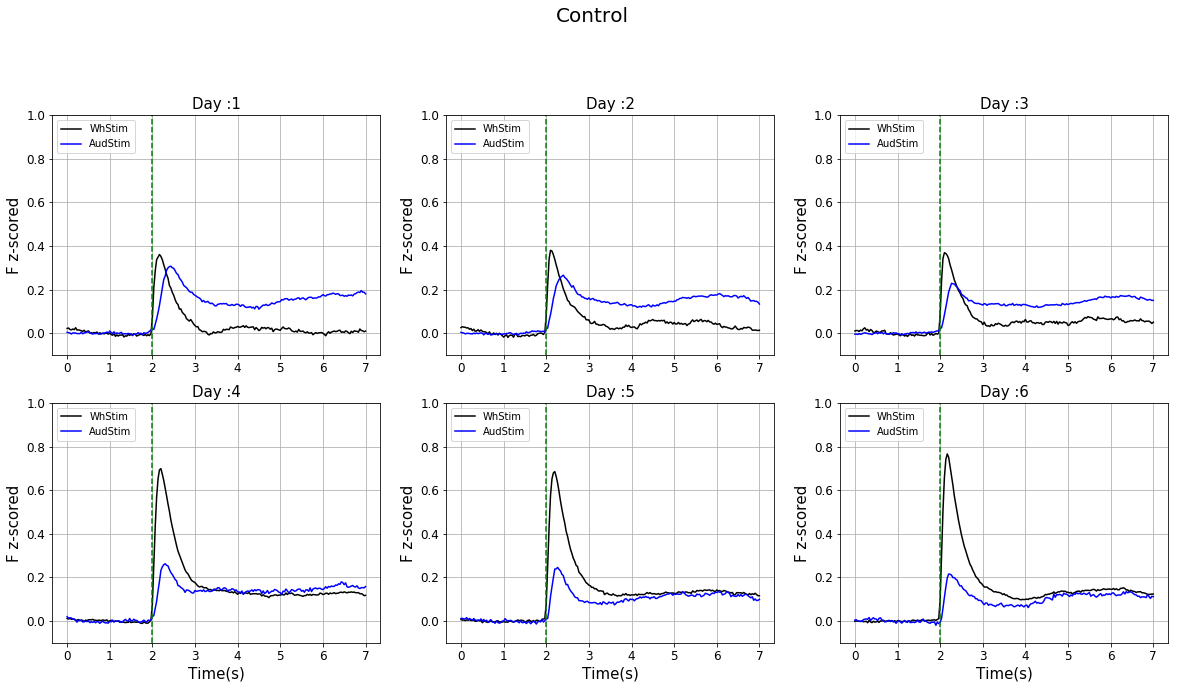

In [10]:
time = np.array(range(0,211))/30
plt.figure(figsize=(20, 15))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.ylim(-0.1,1)
    plt.plot(time,np.mean(dataDays[:,i,:,6],axis = 0),'k',label = 'WhStim')
    plt.title('Day :' + str(i+1),fontsize=15)
    if i in [3,4,5]:
        plt.xlabel('Time(s)',fontsize=15)
    plt.ylabel('F z-scored',fontsize=15)
    plt.plot(time,np.mean(dataDays[:,i,:,7],axis = 0),'b',label = 'AudStim')
    plt.legend(loc='upper left')
    plt.grid(True,linestyle='-')
    plt.axvline(x=2,color = 'g',linestyle='--')
    plt.rc('xtick', labelsize=12) 
    plt.rc('ytick', labelsize=12) 
    plt.suptitle('Control',fontsize =20)
    #plt.plot(np.mean(AllData[i]['WH']['WHDFF'],axis = (0,2))[:]-np.mean(AllData[i]['CR']['CRDFF'],axis = (0,2))[:])

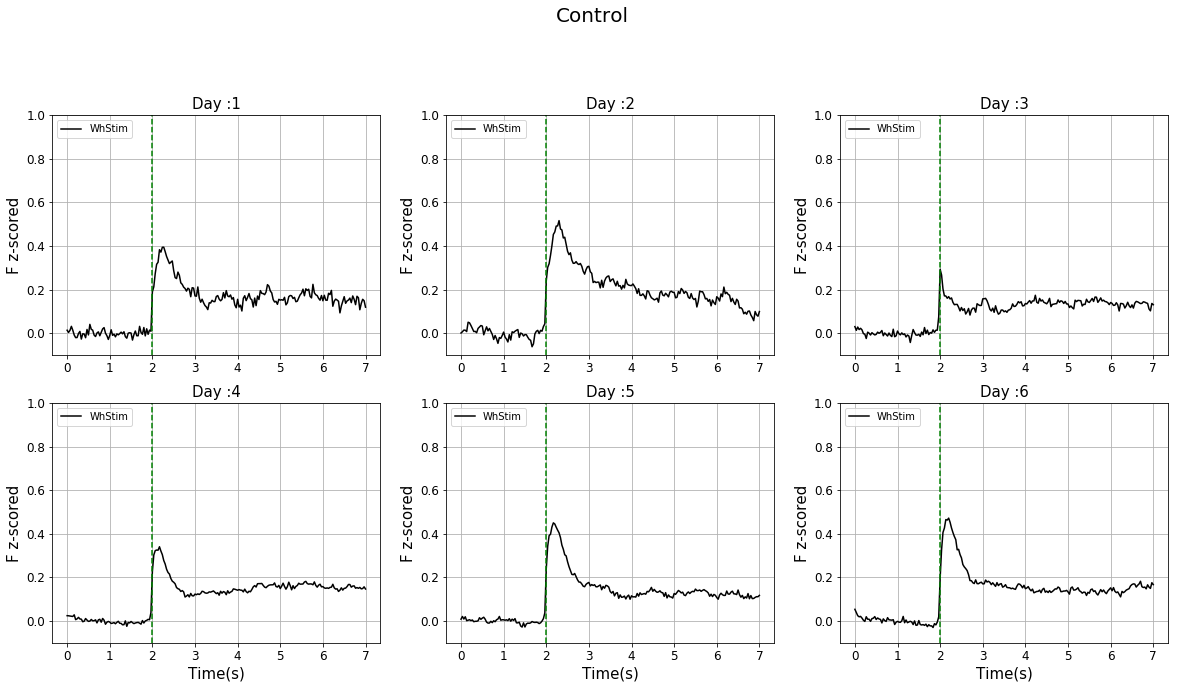

In [25]:
time = np.array(range(0,211))/30
plt.figure(figsize=(20, 15))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.ylim(-0.1,1)
    plt.plot(time,np.mean(dataDaysControl[:,i,:,6],axis = 0),'k',label = 'WhStim')
    plt.title('Day :' + str(i+1),fontsize=15)
    if i in [3,4,5]:
        plt.xlabel('Time(s)',fontsize=15)
    plt.ylabel('F z-scored',fontsize=15)
    #plt.plot(time,np.mean(dataDaysControl[:,i,:,7],axis = 0),'b',label = 'AudStim')
    plt.legend(loc='upper left')
    plt.grid(True,linestyle='-')
    plt.axvline(x=2,color = 'g',linestyle='--')
    plt.rc('xtick', labelsize=12) 
    plt.rc('ytick', labelsize=12) 
    plt.suptitle('Control',fontsize =20)
    #plt.plot(np.mean(AllData[i]['WH']['WHDFF'],axis = (0,2))[:]-np.mean(AllData[i]['CR']['CRDFF'],axis = (0,2))[:])

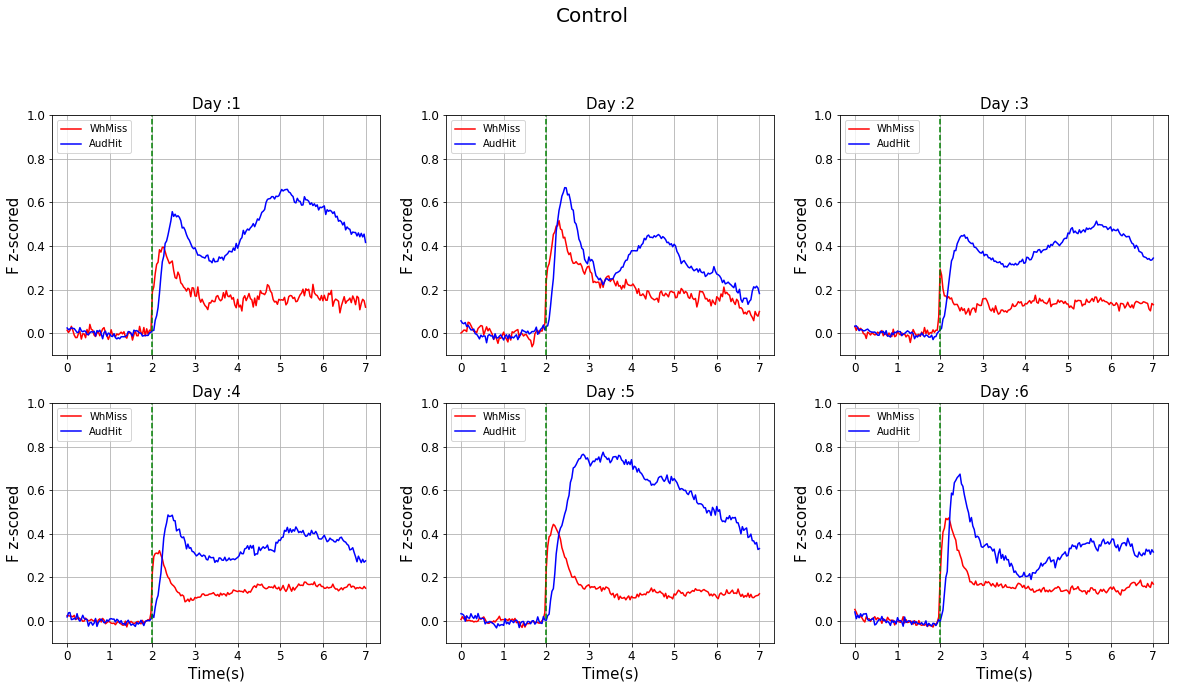

In [23]:
time = np.array(range(0,211))/30
plt.figure(figsize=(20, 15))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.ylim(-0.1,1)
    plt.plot(time,np.mean(dataDaysControl[:,i,:,0],axis = 0),'r',label = 'WhMiss')
    plt.title('Day :' + str(i+1),fontsize=15)
    if i in [3,4,5]:
        plt.xlabel('Time(s)',fontsize=15)
    plt.ylabel('F z-scored',fontsize=15)
    #plt.plot(time,np.mean(dataDaysControl[:,i,:,2],axis = 0),'k',label = 'WhHit')
    plt.plot(time,np.mean(dataDaysControl[:,i,:,3],axis = 0),'b',label = 'AudHit')
    plt.legend(loc='upper left')
    plt.grid(True,linestyle='-')
    plt.axvline(x=2,color = 'g',linestyle='--')
    plt.rc('xtick', labelsize=12) 
    plt.rc('ytick', labelsize=12) 
    plt.suptitle('Control',fontsize =20)
    #plt.plot(np.mean(AllData[i]['WH']['WHDFF'],axis = (0,2))[:]-np.mean(AllData[i]['CR']['CRDFF'],axis = (0,2))[:])

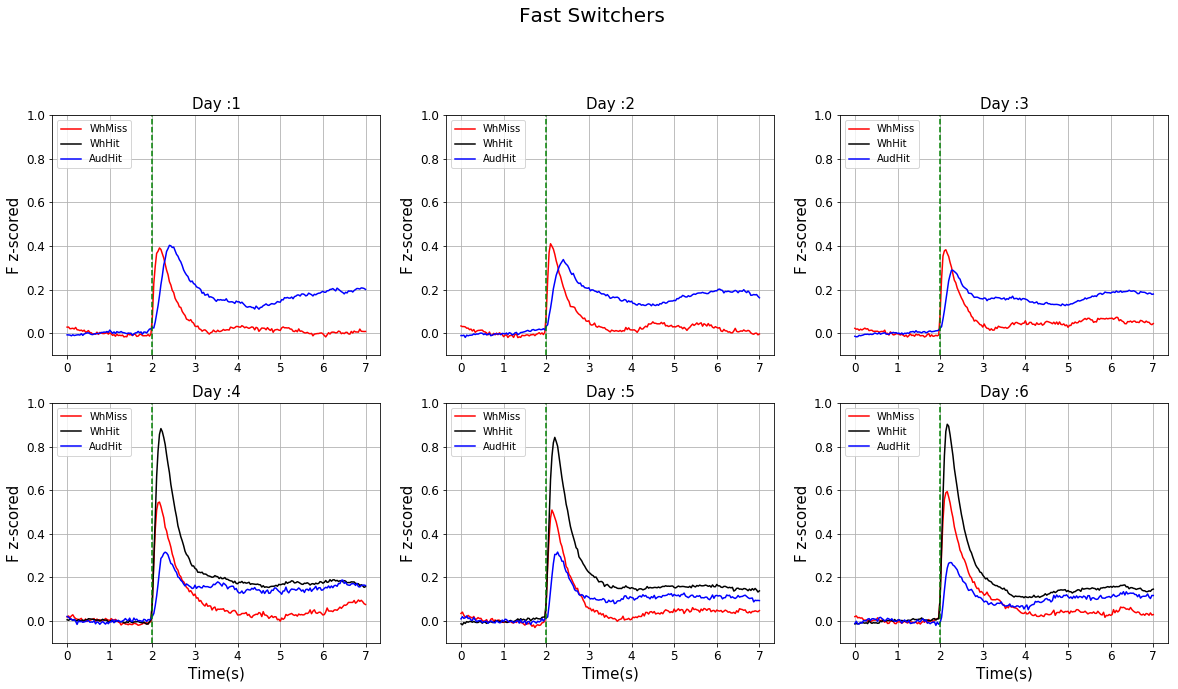

In [30]:
time = np.array(range(0,211))/30
plt.figure(figsize=(20, 15))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.ylim(-0.1,1)
    plt.plot(time,np.mean(dataDaysFS[:,i,:,0],axis = 0),'r',label = 'WhMiss')
    plt.title('Day :' + str(i+1),fontsize=15)
    if i in [3,4,5]:
        plt.xlabel('Time(s)',fontsize=15)
    plt.ylabel('F z-scored',fontsize=15)
    plt.plot(time,np.mean(dataDaysFS[:,i,:,2],axis = 0),'k',label = 'WhHit')
    plt.plot(time,np.mean(dataDaysFS[:,i,:,3],axis = 0),'b',label = 'AudHit')
    plt.legend(loc='upper left')
    plt.grid(True,linestyle='-')
    plt.axvline(x=2,color = 'g',linestyle='--')
    plt.rc('xtick', labelsize=12) 
    plt.rc('ytick', labelsize=12) 
    plt.suptitle('Fast Switchers',fontsize =20)
    #plt.plot(np.mean(AllData[i]['WH']['WHDFF'],axis = (0,2))[:]-np.mean(AllData[i]['CR']['CRDFF'],axis = (0,2))[:])

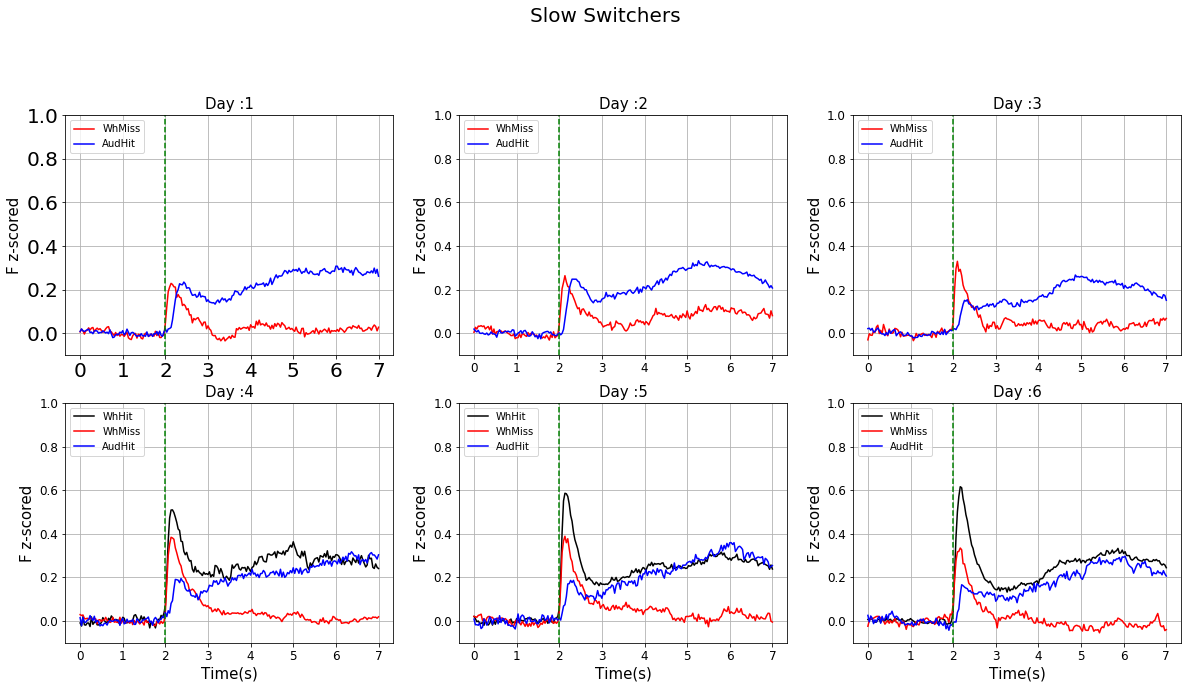

In [66]:
time = np.array(range(0,211))/30
plt.figure(figsize=(20, 15))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.ylim(-0.1,1)
    if i > 2:
        plt.plot(time,np.mean(dataDaysSS[:,i,:,2],axis = 0),'k',label = 'WhHit')
    plt.title('Day :' + str(i+1),fontsize=15)
    if i in [3,4,5]:
        plt.xlabel('Time(s)',fontsize=15)
    plt.ylabel('F z-scored',fontsize=15)
    plt.plot(time,np.mean(dataDaysSS[:,i,:,0],axis = 0),'r',label = 'WhMiss')
    plt.plot(time,np.mean(dataDaysSS[:,i,:,3],axis = 0),'b',label = 'AudHit')
    plt.legend(loc='upper left')
    plt.grid(True,linestyle='-')
    plt.axvline(x=2,color = 'g',linestyle='--')
    plt.rc('xtick', labelsize=12) 
    plt.rc('ytick', labelsize=12) 
    plt.suptitle('Slow Switchers',fontsize =20)
    #plt.plot(np.mean(AllData[i]['WH']['WHDFF'],axis = (0,2))[:]-np.mean(AllData[i]['CR']['CRDFF'],axis = (0,2))[:])

In [13]:
MeanWM = np.mean(dataDays[:,:,:,0],axis = 0)
MeanAM = np.mean(dataDays[:,:,:,1],axis = 0)
MeanWH = np.mean(dataDays[:,:,:,2],axis = 0)
MeanAH = np.mean(dataDays[:,:,:,3],axis = 0)
MeanWMSS = np.mean(dataDaysSS[:,:,:,0],axis = 0)
MeanAMSS = np.mean(dataDaysSS[:,:,:,1],axis = 0)
MeanWHSS = np.mean(dataDaysSS[:,:,:,2],axis = 0)
MeanAHSS = np.mean(dataDaysSS[:,:,:,3],axis = 0)
MeanWMFS = np.mean(dataDaysFS[:,:,:,0],axis = 0)
MeanAMFS = np.mean(dataDaysFS[:,:,:,1],axis = 0)
MeanWHFS = np.mean(dataDaysFS[:,:,:,2],axis = 0)
MeanAHFS = np.mean(dataDaysFS[:,:,:,3],axis = 0)
MeanWMControl = np.mean(dataDaysControl[:,:,:,0],axis = 0)
MeanAMControl = np.mean(dataDaysControl[:,:,:,1],axis = 0)
MeanWHControl = np.mean(dataDaysControl[:,:,:,2],axis = 0)
MeanAHControl = np.mean(dataDaysControl[:,:,:,3],axis = 0)




In [14]:
MeanWStim = np.concatenate((dataDays[:,:,:,0],dataDays[:,:,:,2]),axis = 0)

In [16]:
dataDays.shape

(10, 6, 211, 6)

In [14]:
maxWhMiss = np.zeros(6)
maxWhMissSS = np.zeros(6)
maxWhMissFS = np.zeros(6)
maxWhMissControl = np.zeros(6)
for i in range(6):
    maxWhMiss[i] = np.max(MeanWM[i,:])
    maxWhMissSS[i] = np.max(MeanWMSS[i,:])
    maxWhMissFS[i] = np.max(MeanWMFS[i,:])
    maxWhMissControl[i] = np.max(MeanWMControl[i,:])

In [15]:
maxAH = np.zeros(6)
maxAHSS = np.zeros(6)
maxAHFS = np.zeros(6)
maxAHControl = np.zeros(6)
for i in range(6):
    maxAH[i] = np.max(MeanAH[i,:])
    maxAHSS[i] = np.max(MeanAHSS[i,:])
    maxAHFS[i] = np.max(MeanAHFS[i,:])
    maxAHControl[i] = np.max(MeanAHControl[i,:])

In [20]:
maxWhMiss.shape

(6,)

([<matplotlib.axis.XTick at 0x25777a90>,
 <a list of 6 Text xticklabel objects>)

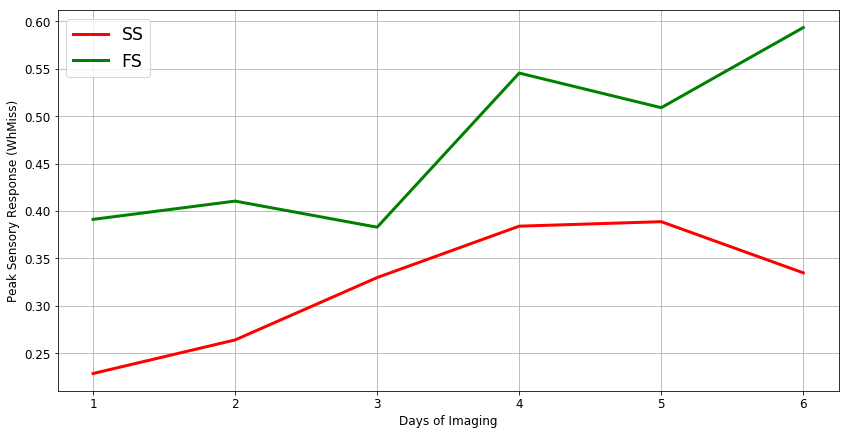

In [22]:
locs = range(6)
plt.figure(figsize=(14, 7))
plt.grid(True,linestyle='-')
#plt.plot(maxWhMiss,linewidth = 3,color = 'k',label = 'All')
plt.plot(maxWhMissSS,linewidth = 3,color = 'r',label = 'SS')
plt.plot(maxWhMissFS,linewidth = 3,color = 'g',label = 'FS')
#plt.plot(maxWhMissControl,linewidth = 3,color = 'b',label = 'C')
plt.ylabel('Peak Sensory Response (WhMiss)',fontsize=12)
plt.xlabel('Days of Imaging',fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.legend(loc='upper left',fontsize = 'xx-large')
new_xticks=['1','2','3','4','5','6']
plt.xticks(locs,new_xticks)


([<matplotlib.axis.XTick at 0x24041748>,
 <a list of 3 Text xticklabel objects>)

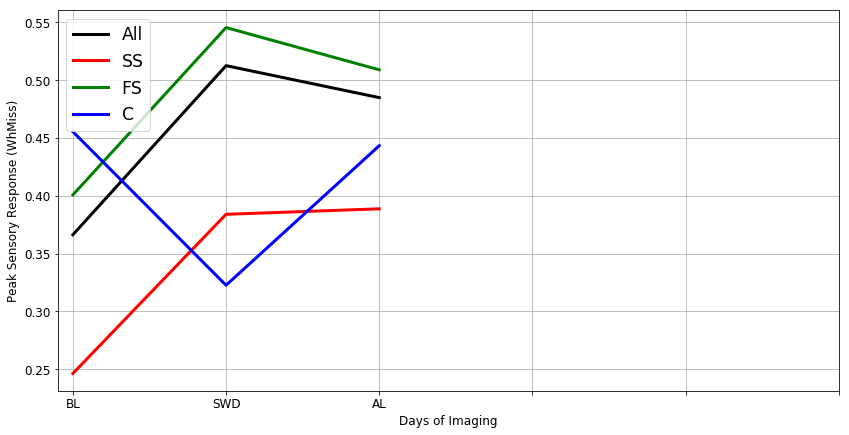

In [35]:
locs = range(6)
plt.figure(figsize=(14, 7))
plt.grid(True,linestyle='-')
plt.plot([np.mean(maxWhMiss[0:2]),maxWhMiss[3],np.mean(maxWhMiss[4:5])],linewidth = 3,color = 'k',label = 'All')
plt.plot([np.mean(maxWhMissSS[0:2]),maxWhMissSS[3],np.mean(maxWhMissSS[4:5])],linewidth = 3,color = 'r',label = 'SS')
plt.plot([np.mean(maxWhMissFS[0:2]),maxWhMissFS[3],np.mean(maxWhMissFS[4:5])],linewidth = 3,color = 'g',label = 'FS')
plt.plot([np.mean(maxWhMissControl[0:2]),maxWhMissControl[3],np.mean(maxWhMissControl[4:5])],linewidth = 3,color = 'b',label = 'C')
#plt.plot(maxWhMissFS,linewidth = 3,color = 'g',label = 'FS')
#plt.plot(maxWhMissControl,linewidth = 3,color = 'b',label = 'C')
plt.ylabel('Peak Sensory Response (WhMiss)',fontsize=12)
plt.xlabel('Days of Imaging',fontsize=12)
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 
plt.legend(loc='upper left',fontsize = 'xx-large')
new_xticks=['BL','SWD','AL']
plt.xticks(locs,new_xticks)

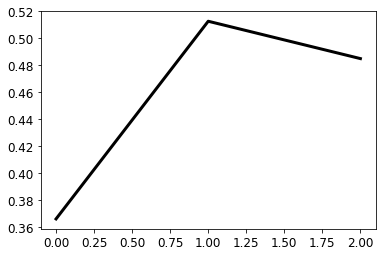

In [31]:
plt.plot([np.mean(maxWhMiss[0:2]),maxWhMiss[3],np.mean(maxWhMiss[4:5])],linewidth = 3,color = 'k',label = 'All')

In [30]:
[np.mean(maxWhMiss[0:2]),maxWhMiss[3],np.mean(maxWhMiss[4:5])]

[0.36629445087573487, 0.512584097133867, 0.4849351653209661]

([<matplotlib.axis.XTick at 0x23e5a0f0>,
 <a list of 6 Text xticklabel objects>)

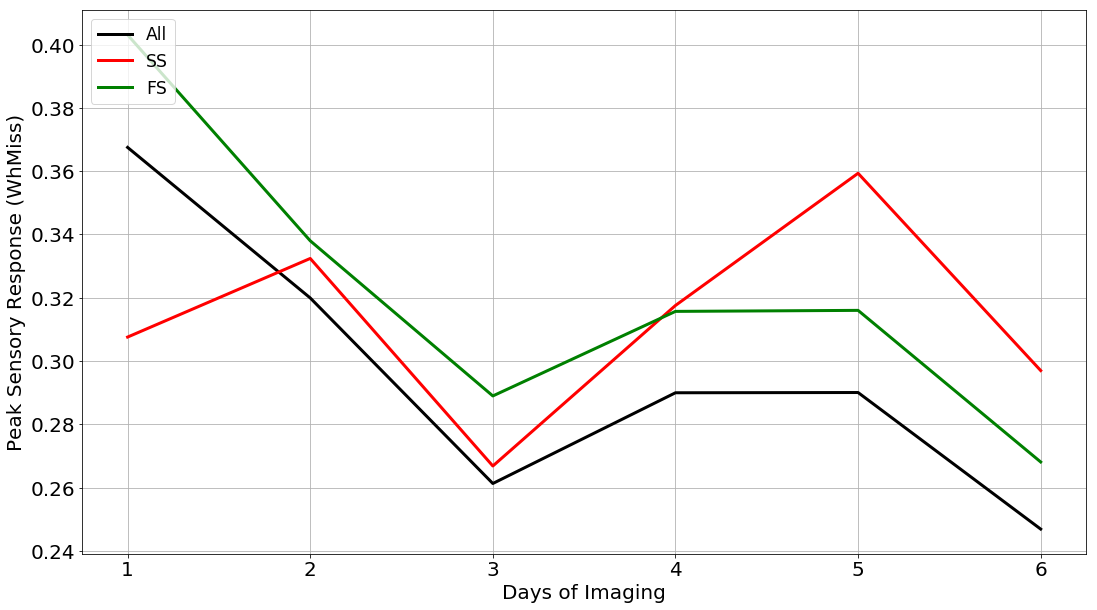

In [65]:
locs = range(6)
plt.figure(figsize=(18, 10))
plt.grid(True,linestyle='-')
plt.plot(maxAH,linewidth = 3,color = 'k',label = 'All')
plt.plot(maxAHSS,linewidth = 3,color = 'r',label = 'SS')
plt.plot(maxAHFS,linewidth = 3,color = 'g',label = 'FS')
plt.ylabel('Peak Sensory Response (WhMiss)',fontsize=20)
plt.xlabel('Days of Imaging',fontsize=20)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.legend(loc='upper left',fontsize = 'xx-large')
new_xticks=['1','2','3','4','5','6']
plt.xticks(locs,new_xticks)


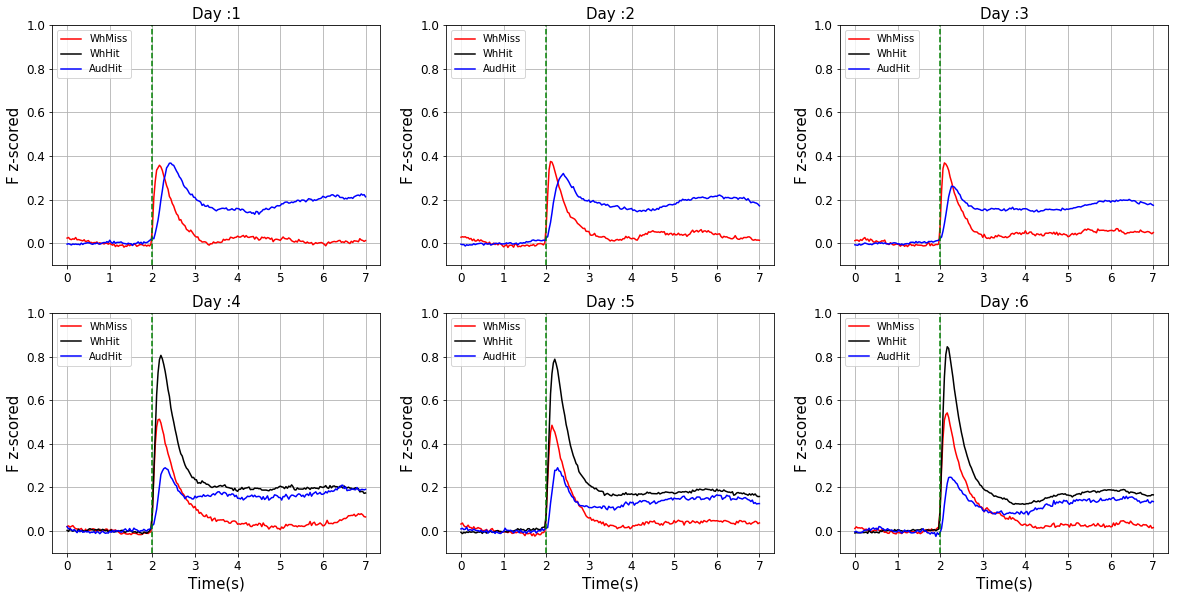

In [44]:
time = np.array(range(0,211))/30
plt.figure(figsize=(20, 15))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.ylim(-0.1,1)
    plt.plot(time,np.mean(dataDays[:,i,:,0],axis = 0),'r',label = 'WhMiss')
    plt.title('Day :' + str(i+1),fontsize=15)
    if i in [3,4,5]:
        plt.xlabel('Time(s)',fontsize=15)
    plt.ylabel('F z-scored',fontsize=15)
    plt.plot(time,np.mean(dataDays[:,i,:,2],axis = 0),'k',label = 'WhHit')
    plt.plot(time,np.mean(dataDays[:,i,:,3],axis = 0),'b',label = 'AudHit')
    plt.legend(loc='upper left')
    plt.grid(True,linestyle='-')
    plt.axvline(x=2,color = 'g',linestyle='--')
    plt.rc('xtick', labelsize=12) 
    plt.rc('ytick', labelsize=12) 
    #plt.plot(np.mean(AllData[i]['WH']['WHDFF'],axis = (0,2))[:]-np.mean(AllData[i]['CR']['CRDFF'],axis = (0,2))[:])

In [ ]:
time = np.array(range(0,211))/30
plt.figure(figsize=(20, 15))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.ylim(-0.1,1)
    plt.plot(time,np.mean(dataDays[:,i,:,0],axis = 0),'r',label = 'WhMiss')
    plt.title('Day :' + str(i+1),fontsize=15)
    if i in [3,4,5]:
        plt.xlabel('Time(s)',fontsize=15)
    plt.ylabel('F z-scored',fontsize=15)
    plt.plot(time,np.mean(dataDays[:,i,:,2],axis = 0),'k',label = 'WhHit')
    plt.plot(time,np.mean(dataDays[:,i,:,3],axis = 0),'b',label = 'AudHit')
    plt.legend(loc='upper left')
    plt.grid(True,linestyle='-')
    plt.axvline(x=2,color = 'g',linestyle='--')
    plt.rc('xtick', labelsize=12) 
    plt.rc('ytick', labelsize=12) 
    #plt.plot(np.mean(AllData[i]['WH']['WHDFF'],axis = (0,2))[:]-np.mean(AllData[i]['CR']['CRDFF'],axis = (0,2))[:])

In [9]:
time = np.array(range(0,211))/30
for i in range(6):
    p = bokeh.plotting.figure(
        width=700,
        height=400,
        x_axis_label='Time (s)',
        y_axis_label='DF/F z-scored',
        title= 'Day: ' + str(i+1)  + ' (n = ' + str(dataDays.shape[0])  + ')'
        )
    if i == 3:
        
        p = bokeh.plotting.figure(
        width=700,
        height=400,
        x_axis_label='Time (s)',
        y_axis_label='DF/F z-scored',
        title= 'Day: ' + str(i+1) + ', SWD' + ' (n = ' + str(dataDays.shape[0]) + ')'
        )
        
    p.line(
    x= time,
    y= np.mean(dataDays[:,i,:,2],axis = 0),
    line_join='bevel',
    line_width=2,
    color = 'black',
    )
    
    p.yaxis.axis_label_text_font_style = "bold"
    p.xaxis.axis_label_text_font_style = "bold"
    p.title.align = 'center'
    
    bokeh.io.show(p) 





In [13]:
time = np.array(range(0,211))/30

In [15]:
time

array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
       0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
       0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
       0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
       0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
       0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
       1.        , 1.03333333, 1.06666667, 1.1       , 1.13333333,
       1.16666667, 1.2       , 1.23333333, 1.26666667, 1.3       ,
       1.33333333, 1.36666667, 1.4       , 1.43333333, 1.46666667,
       1.5       , 1.53333333, 1.56666667, 1.6       , 1.63333333,
       1.66666667, 1.7       , 1.73333333, 1.76666667, 1.8       ,
       1.83333333, 1.86666667, 1.9       , 1.93333333, 1.96666667,
       2.        , 2.03333333, 2.06666667, 2.1       , 2.13333333,
       2.16666667, 2.2       , 2.23333333, 2.26666667, 2.3       ,
       2.33333333, 2.36666667, 2.4       , 2.43333333, 2.46666

In [6]:
errorAudH = np.nanstd(dataAll[:,:,0],axis = 0)/np.sqrt(np.sum(np.invert(np.isnan(dataAll[:,:,0])),axis = 0))
errorWhH = np.nanstd(dataAll[:,:,1],axis = 0)/np.sqrt(np.sum(np.invert(np.isnan(dataAll[:,:,1])),axis = 0))
errorFA = np.nanstd(dataAll[:,:,2],axis = 0)/np.sqrt(np.sum(np.invert(np.isnan(dataAll[:,:,2])),axis = 0))


MeanAudH = np.nanmean(dataAll[:,:,0],axis=0)
MeanWhH = np.nanmean(dataAll[:,:,1],axis=0)
MeanFA = np.nanmean(dataAll[:,:,2],axis=0)

Days = dataAll.shape[1] + 1

p = bokeh.plotting.figure(
    width=900,
    height=500,
    x_axis_label='Days of training',
    y_axis_label='AudHit/WhHit/FA',
    title= 'Mean Behaviour (n=15)' 
    )

p.yaxis.axis_label_text_font_style = "bold"
p.xaxis.axis_label_text_font_style = "bold"
p.title.align = 'center'


audh = p.line(
x= range(1,Days,1),
y= MeanAudH ,
line_join='bevel',
line_width=2,
color = 'blue',
)


err_xs = []
err_ys = []

for x, y, yerr in zip(range(1,Days,1), MeanAudH, errorAudH ):
    err_xs.append((x, x))
    err_ys.append((y - yerr, y + yerr))

# plot them
p.multi_line(err_xs, err_ys, color='blue')



err_xs = []
err_ys = []

for x, y, yerr in zip(range(1,Days,1), MeanWhH, errorWhH ):
    err_xs.append((x, x))
    err_ys.append((y - yerr, y + yerr))

# plot them
p.multi_line(err_xs, err_ys, color='black')


err_xs = []
err_ys = []

for x, y, yerr in zip(range(1,Days,1), MeanFA, errorFA ):
    err_xs.append((x, x))
    err_ys.append((y - yerr, y + yerr))

# plot them
p.multi_line(err_xs, err_ys, color='red')


p.circle(range(1,Days,1), MeanAudH , color='blue', size=5, line_alpha=0)

fa = p.line(
x= range(1,Days,1),
y= MeanFA,
line_join='bevel',
line_width=2,
color = 'red',
)

p.circle(range(1,Days,1), MeanFA , color='red', size=5, line_alpha=0)

whhit = p.line(
x= range(1,Days,1),
y= MeanWhH,
line_join='bevel',
line_width=2,
color = 'black',
)

p.circle(range(1,Days,1), MeanWhH , color='black', size=5, line_alpha=0)

legend = Legend(items=[
("AudHit" , [audh]),
("WhHit" , [whhit]),
("FA" , [fa])   
], location="center")

p.add_layout(legend, 'right')

p.legend.click_policy="hide"

bokeh.io.show(p) 

errorDprime = np.nanstd(dataAll[:,:,3],axis = 0)/np.sqrt(np.sum(np.invert(np.isnan(dataAll[:,:,3])),axis = 0))
MeanDprime = np.nanmean(dataAll[:,:,3],axis=0)

k = bokeh.plotting.figure(
    width=900,
    height=500,
    x_axis_label='Days of training',
    y_axis_label='dprime for W',
    title= 'Mean dprime (n=15)' 
    )

k.yaxis.axis_label_text_font_style = "bold"
k.xaxis.axis_label_text_font_style = "bold"
k.title.align = 'center'

dprime = k.line(
x= range(1,Days,1),
y= MeanDprime ,
line_join='bevel',
line_width=2,
color = 'green',
)


err_xs = []
err_ys = []

for x, y, yerr in zip(range(1,Days,1), MeanDprime, errorDprime):
    err_xs.append((x, x))
    err_ys.append((y - yerr, y + yerr))

# plot them
k.multi_line(err_xs, err_ys, color='green')
bokeh.io.show(k) 
